In [1]:
from urllib.request import urlretrieve, urlopen
import json
import os

def download(url, filename):
    # Download the file and save it in the current directory
    try:
        # Remove the file if it exists
        if os.path.exists(filename):
            os.remove(filename)
        # Download and save the file
        urlretrieve(url, filename)
        print(f"File '{filename}' downloaded successfully.")
    except Exception as e:
        print(f"An error occurred during downloading file {filename}: {e}")

In [2]:
url = "https://raw.githubusercontent.com/me2d09/LongHCPulse/refs/heads/master/LongHCPulse.py"
file = "LongHCPulse.py"
download(url,file)

File 'LongHCPulse.py' downloaded successfully.


In [6]:
#Set the base URL and ITEM_ID
BASE_URL = 'https://api.figshare.com/v2'
ITEM_ID = 27151218   # https://doi.org/10.6084/m9.figshare.27151218.v1
#Retrieve public metadata from the endpoint
r=urlopen(f'{BASE_URL}/articles/{ITEM_ID}')
metadata=json.loads(r.read())
for f in metadata["files"]:
    print(f['download_url'],f['name'])
    download(f['download_url'],f['name'])
    pass

https://ndownloader.figshare.com/files/49558686 20240530_VCl3_HC_pulses.raw
File '20240530_VCl3_HC_pulses.raw' downloaded successfully.
https://ndownloader.figshare.com/files/49558689 Puck921.cal
File 'Puck921.cal' downloaded successfully.


In [7]:
!pip install periodictable
import numpy as np
import matplotlib.pyplot as plt
from LongHCPulse import LongHCPulse
from periodictable import formula

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for periodictable: filename=periodictable-1.7.1-py3-none-any.whl size=752512 sha256=227033cdf45cbf014e14321860c036fa57902d8c34be4548a8a4d62a535d560d
  Stored in directory: /root/.cache/pip/wheels/55/2b/21/c35cc7b4e26fffa3ec4f32a74bd09ce6ce04ba7535dd0b92f2
Successfully built periodictable


In [8]:
mm = formula('VCl3').mass

datafile = "20240530_VCl3_HC_pulses.raw"
DRcalfile = "Puck921.cal"
# find out correct mass
vcl = LongHCPulse(datafile=datafile,calfile=DRcalfile,
    sampmass=2.93,molarmass=mm, useRawTemp=True)

vcl.heatcapacity()

**************** LongHCPulse v 1.3.3 *****************
 please cite   https://doi.org/10.1007/s10909-018-2042-9
******************************************************
 - Importing data...
 100%
 - Computing Heat Capacity...
 100%


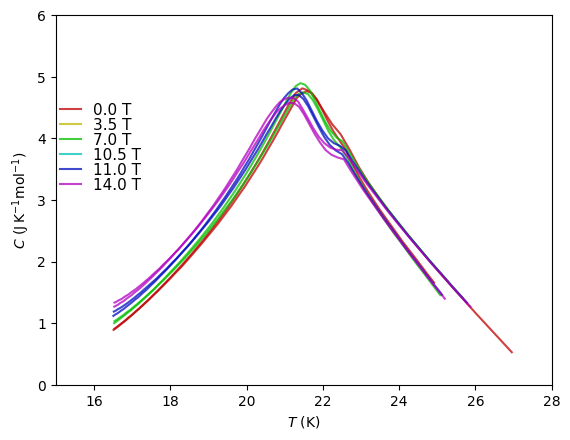

In [22]:
vcl.labels=[]
vcl.shortpulselabels=[]
f,ax = plt.subplots(1,1)

vcl.lineplot(ax,"All", demag=False)

ax.set_ylabel("$C$ $(\\rm{J\\> K^{-1} mol^{-1}})$")
ax.set_xlabel("$T$ (K)")

# Show legend
short_legend=ax.legend(handles=vcl.shortpulselabels,labelspacing = 0,handlelength=1.4,
    fontsize=11,frameon=False, bbox_to_anchor=(0.97, 1.0),numpoints=1)
long_legend=ax.legend(handles=vcl.labels,labelspacing = 0,handlelength=1.4,fontsize=11,
    frameon=False, bbox_to_anchor=(0.2, 0.8))
ax.add_artist(short_legend)

#FIX that
plt.ylim(0,6)
plt.xlim(15,28)
plt.savefig("fig1.pdf")